In [1]:
from drivecycle import route, trajectory, utils, plots, graph, energy

import matplotlib.pyplot as plt
import networkx as nx

import requests
import polyline
import json
import pandas as pd
import numpy as np

import pickle

In [2]:
with open('edges', 'rb') as handle:
    edges = pickle.load(handle)
    
with open('stops', 'rb') as handle:
    stops = pickle.load(handle)

In [3]:
edges


[{'end_node': {'type': 'street_intersection',
   'elapsed_time': 0.698,
   'intersecting_edges': [{'road_class': 'service_other',
     'begin_heading': 204,
     'to_edge_name_consistency': False,
     'from_edge_name_consistency': False}]},
  'length': 0.007,
  'names': ['48 Avenue NW'],
  'speed': 35,
  'way_id': 463682703},
 {'end_node': {'type': 'street_intersection',
   'elapsed_time': 7.607,
   'intersecting_edges': [{'road_class': 'residential',
     'begin_heading': 131,
     'to_edge_name_consistency': False,
     'from_edge_name_consistency': False}]},
  'length': 0.067,
  'names': ['48 Avenue NW'],
  'speed': 35,
  'way_id': 463682703},
 {'end_node': {'type': 'street_intersection',
   'elapsed_time': 23.67,
   'intersecting_edges': [{'road_class': 'residential',
     'begin_heading': 177,
     'to_edge_name_consistency': False,
     'from_edge_name_consistency': False},
    {'road_class': 'residential',
     'begin_heading': 0,
     'to_edge_name_consistency': False,
     'f

In [4]:
data_ = []
for edge in edges:
    length = edge["length"]*1000
    speed = edge["speed"]
    way_id = edge["way_id"]
    try:
        intersect = [edge["end_node"]["intersecting_edges"][0]["road_class"]]
    except:
        intersect = [None]

    item = {
        "way_id":way_id,
        "length":length,
        "speed":speed,
        "intersection":intersect,
    }
    data_.append(item)

In [5]:
len(data_)

347

In [6]:
data_

[{'way_id': 463682703,
  'length': 7.0,
  'speed': 35,
  'intersection': ['service_other']},
 {'way_id': 463682703,
  'length': 67.0,
  'speed': 35,
  'intersection': ['residential']},
 {'way_id': 463682703,
  'length': 156.0,
  'speed': 35,
  'intersection': ['residential']},
 {'way_id': 463682702,
  'length': 44.0,
  'speed': 35,
  'intersection': ['residential']},
 {'way_id': 139293935,
  'length': 130.0,
  'speed': 35,
  'intersection': ['residential']},
 {'way_id': 139293935,
  'length': 144.0,
  'speed': 30,
  'intersection': ['service_other']},
 {'way_id': 139293935,
  'length': 16.0,
  'speed': 30,
  'intersection': ['service_other']},
 {'way_id': 139293935,
  'length': 13.0,
  'speed': 30,
  'intersection': ['residential']},
 {'way_id': 199138512,
  'length': 48.0,
  'speed': 40,
  'intersection': ['service_other']},
 {'way_id': 199138512,
  'length': 50.0,
  'speed': 40,
  'intersection': ['residential']},
 {'way_id': 199138512,
  'length': 49.0,
  'speed': 40,
  'intersectio

In [13]:
a = graph.Graph(data_)
a.include_stops(stops)
a.consolidate_intersections()
a.simplify_graph()

In [14]:
stop={"bus_stop":30,"tertiary":10}
dc = route.sequential(a.get_edges(),stops=stop, stop_at_node=True, step=1)

INFO:root:Could not complete segment: ti: 142.00, tf: 5.54,  vi: 11.11 , vf: 0.00,                                 v_target:13.89, length: 61.60
INFO:root:Vi: 0.00. Reducing vf to 10.00 and v_target to 12.50 at time 339.544 and segment length 55.0
INFO:root:Vi: 0.00. Reducing vf to 10.00 and v_target to 10.00 at time 726.544 and segment length 55.0
INFO:root:Vi: 0.00. Reducing vf to 12.50 and v_target to 12.50 at time 1167.5439999999999 and segment length 68.20000000000073
INFO:root:Vi: 0.00. Reducing vf to 11.25 and v_target to 11.25 at time 1167.5439999999999 and segment length 68.20000000000073
INFO:root:Could not complete segment: ti: 1195.54, tf: 3.61,  vi: 13.89 , vf: 0.00,                                 v_target:13.89, length: 50.20
INFO:root:Could not complete segment: ti: 1512.16, tf: 4.42,  vi: 11.11 , vf: 0.00,                                 v_target:11.11, length: 49.10
INFO:root:Vi: 0.00. Reducing vf to 10.00 and v_target to 10.00 at time 1636.5774000000001 and segment l

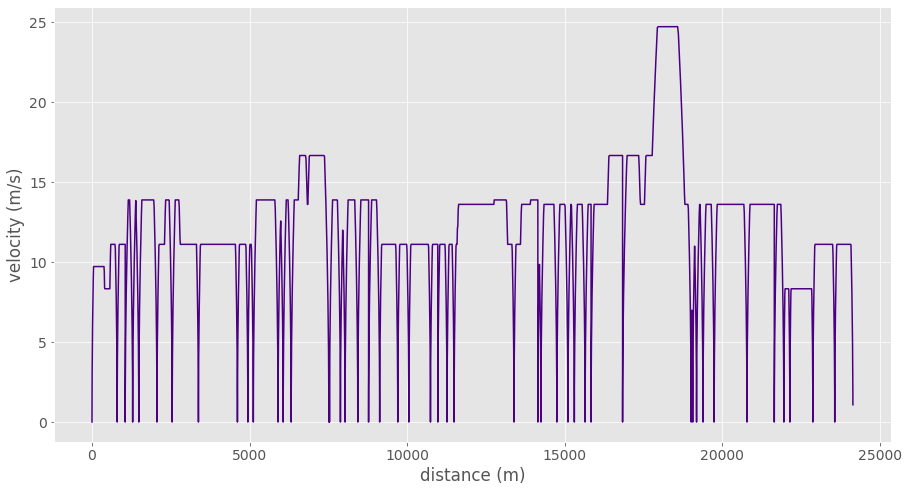

In [15]:
plots.plot_vd(dc,"route_drivecycle.png")

In [16]:
len(a.get_edges())

120

In [17]:
dc

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 5.00000000e-01],
       [2.00000000e+00, 2.00000000e+00, 2.00000000e+00],
       ...,
       [3.12909787e+03, 3.07955556e+00, 2.41348237e+04],
       [3.13009787e+03, 2.07955556e+00, 2.41374033e+04],
       [3.13109787e+03, 1.07955556e+00, 2.41389828e+04]])

In [74]:
power = energy.energy_model(dc,m=15000, area=8.5, capacity=555, power_aux=4, gear_ratio=4, regen_ratio=0.5)


final = np.c_[dc, power[:,4]]

In [75]:
np.round(np.average(final[:,1]),2)
power[-1,4]

0.9481258877167773

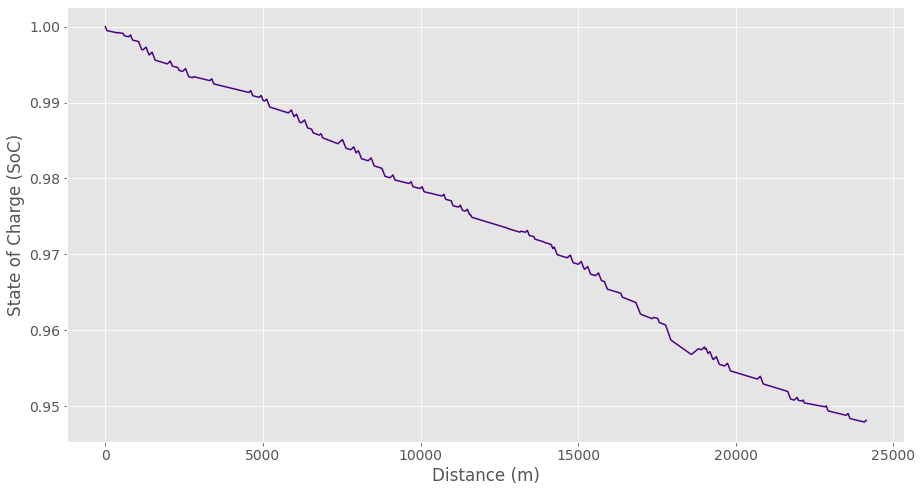

SoC: 0.9481258877167773


In [51]:
t=[i[2] for i in final]
p=[i[3] for i in final]

plt.figure(figsize=(15, 8))
plt.plot(t,p, color='#4b0082', linewidth=1.5)
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams.update({'font.size': 14})
plt.xlabel("Distance (m)")
plt.ylabel("State of Charge (SoC)")
plt.savefig("Soc_chart.png", transparent=False, bbox_inches='tight')
plt.show()

print(f"SoC: {power[-1,4]}")

<Figure size 432x288 with 0 Axes>